In [4]:
from base import np
from oneD import Solver1D, Solver1D_UniformBacterium

# Export figures to Folder
figures_path = "../TFG_latex/Figures/Nutrients1D/"

## Results for different Bacterial Concentrations

In [5]:
syst_params = {
'L' : 1.0,  'T' : 0.3,  # Lenght & Time Domain
'alpha': 10,         # Timescales Ratio (Tc/Td)
'nx': 1000,   'nt': 100  # Num Spatial/Temporal Points
}
L = syst_params['L']

# Initial condition for nutrients
def n0_linear(x):
    return x / L

### 1. Constant Concentration 📄

📄: linked to the TFG script

$$C_{const}(x) = 1$$

With Analytical Solution, so that we verify the discretisation has been done correctly.

General solution:
           -√α⋅x       √α⋅x
n(x) = C₁⋅ℯ      + C₂⋅ℯ    
Particular solution:
       ⎛     2⋅√α⋅x⎞  √α⋅(L - x)
       ⎝1 - ℯ      ⎠⋅ℯ          
n(x) = ─────────────────────────
                   2⋅L⋅√α       
              1 - ℯ             
Numeric solution:
       ⎛     2⋅√10⋅x⎞  -√10⋅(x - 1.0)
       ⎝1 - ℯ       ⎠⋅ℯ              
n(x) = ──────────────────────────────
                     2.0⋅√10         
                1 - ℯ                


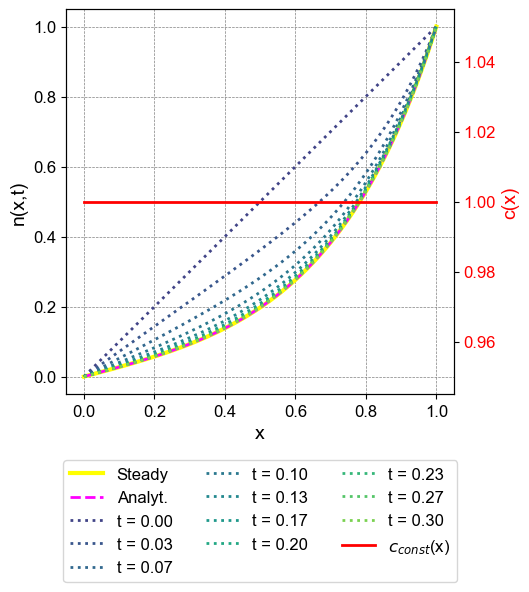

In [6]:
# Nutrient eater concentration function
def c_const(x):
    return np.ones_like(x)

# Create an instance of the class and solve the PDE
S1D_Unif = Solver1D_UniformBacterium(syst_params, n0_linear)

S1D_Unif.pde.solve(); S1D_Unif.ode.solve(); S1D_Unif.ode.analyt.solve()
S1D_Unif.ode.analyt.print_solutions()

S1D_Unif.plot.concentrations(legend_loc='outside')
S1D_Unif.plot.save(figures_path, "c_const(x)_Analyt")

In [16]:
print(f'Tc/Td = {S1D_Unif.T_ratio}')

n_num = S1D_Unif.ode.n[1:]
n_analyt = S1D_Unif.ode.analyt.n[1:] # we remove the first point to avoid division by zero

relative_error = np.abs(n_num - n_analyt) / np.abs(n_analyt)
print(f'Mean Relative Error: {relative_error.mean():.2e} parts per one or {relative_error.mean()*1_000_000:.3f} parts per million')

Tc/Td = 0.2
Mean Relative Error: 5.57e-07 parts per one or 0.557 parts per million


### 2. Exponential Concentrations 📄

$$
c_{\text{exp--}}(x; \delta) =
    \frac{1}{\delta L}
    \frac{\mathrm{e}^{\frac{1}{\delta}(1-\frac{x}{L})}}{\mathrm{e}^{\frac{1}{\delta}} -1}
\quad \text{\&} \quad
c_{\text{exp+}}(x; \delta) =
    \frac{1}{\delta L}
    \frac{\mathrm{e}^{\frac{x}{\delta L}}}{\mathrm{e}^{\frac{1}{\delta}} - 1}
$$

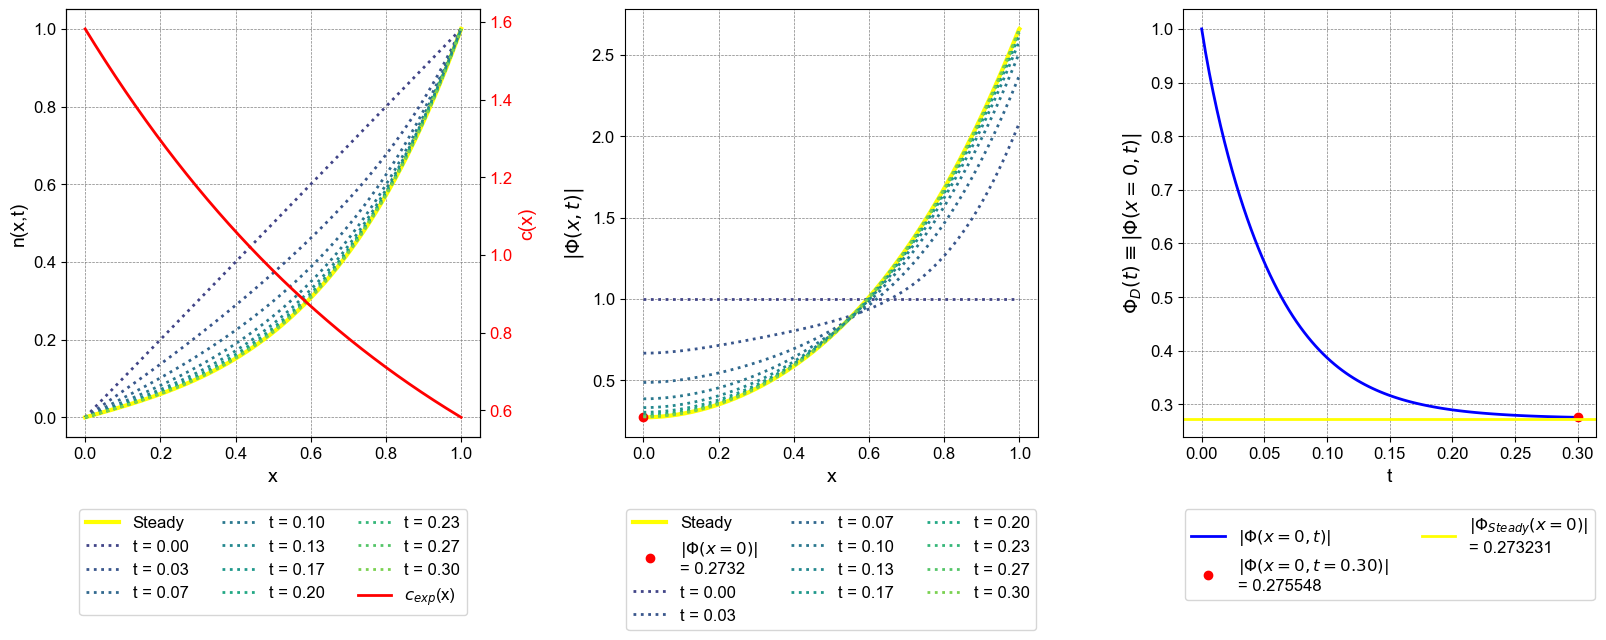

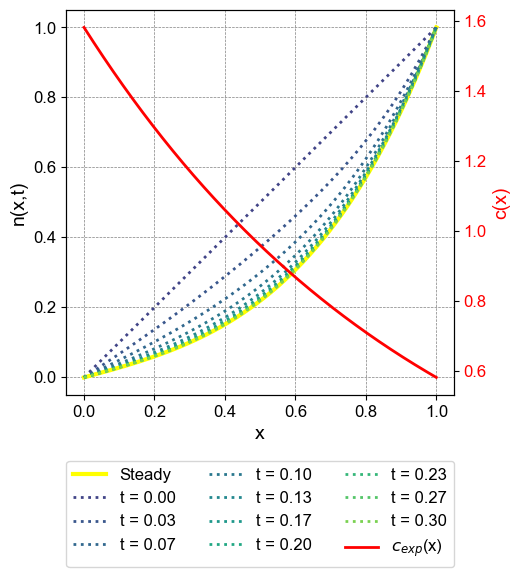

In [5]:
# Nutrient eater concentration function
def c_exp_decr(x):
    delta = 1
    return np.exp((1 - x /L)/delta) / (delta * L * (np.exp(1/delta) - 1))

S1D = Solver1D(syst_params, c_exp_decr, n0_linear)
S1D.pde.solve(); S1D.ode.solve()

S1D.plot.triple_plot(legend_loc='outside')
S1D.plot.save(figures_path, "c_exp_decr(x)_3plot")
S1D.plot.concentrations(legend_loc='outside')

S1D.plot.save(figures_path, "c_exp_decr(x)")

In [6]:
print(f'T_<c>/T_d = {S1D.T_ratio}\nT_<c>\t  = {S1D.Tc}')

T_<c>/T_d = 0.2
T_<c>	  = 0.1


$$
c_{\text{exp+}}(x; \delta) =
    \frac{1}{\delta L}
    \frac{\mathrm{e}^{\frac{x}{\delta L}}}{\mathrm{e}^{\frac{1}{\delta}} - 1}
$$

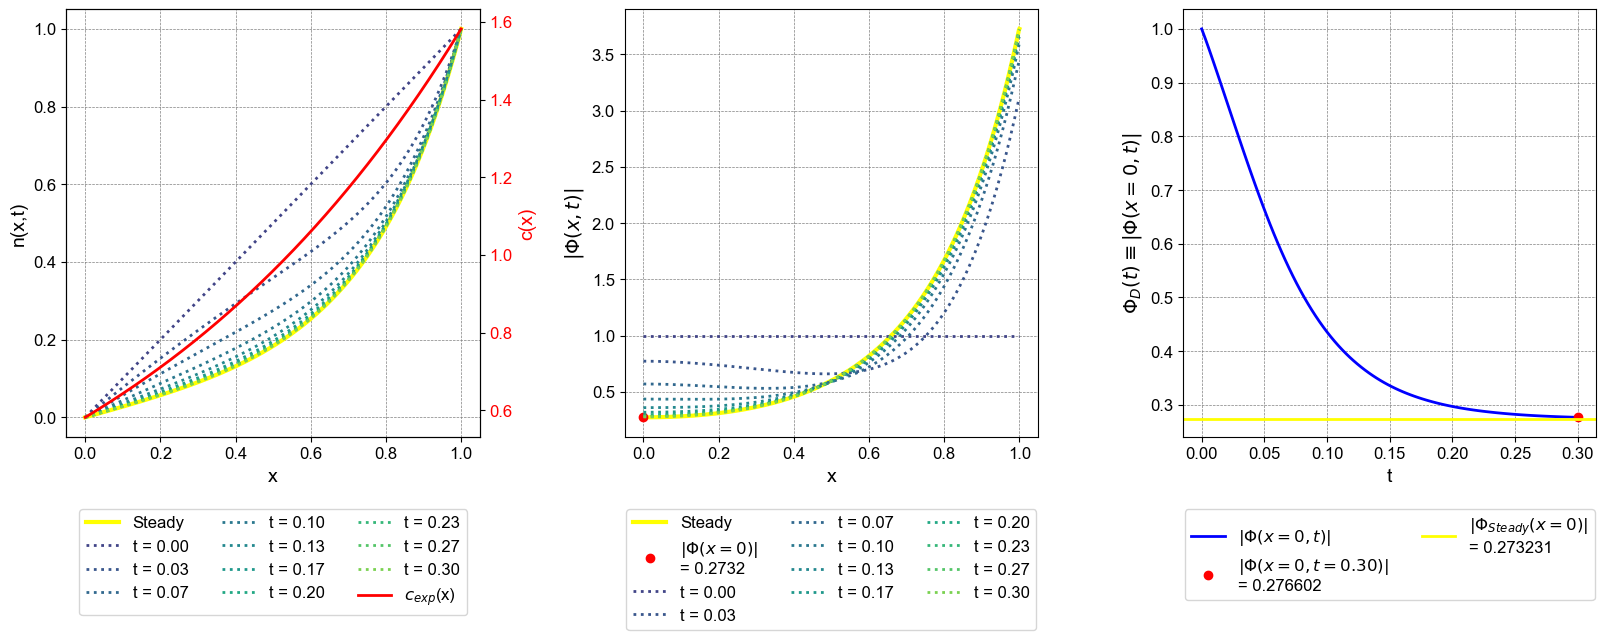

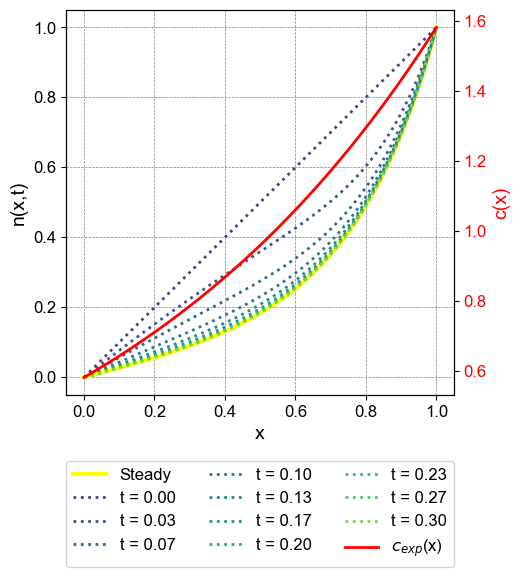

In [7]:
# Nutrient eater concentration function
def c_exp_incr(x):
    delta = 1
    return np.exp( x / (delta*L) ) / (delta * L * (np.exp(1/delta) - 1))

S1D = Solver1D(syst_params, c_exp_incr, n0_linear)
S1D.pde.solve(); S1D.ode.solve()

S1D.plot.triple_plot(legend_loc='outside')
S1D.plot.save(figures_path, "c_exp_incr(x)_3plot")
S1D.plot.concentrations(legend_loc='outside')
S1D.plot.save(figures_path, "c_exp_incr(x)")

In [8]:
print(f'T_<c>/T_d = {S1D.T_ratio}\nT_<c>\t  = {S1D.Tc}')

T_<c>/T_d = 0.2
T_<c>	  = 0.1


### 3. Step Concentrations

#### 3.1. One Parameter ❌📄

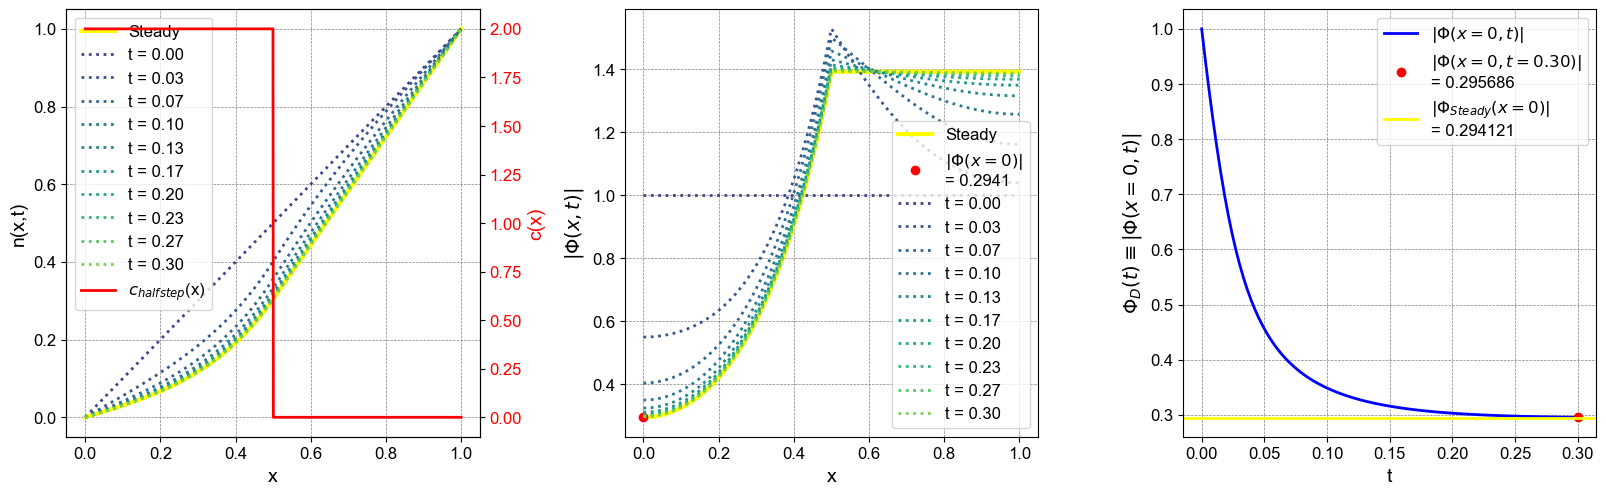

In [9]:
def c_halfstep(x):
    l=L/2
    return np.where(x < l, 1 / l, 0) # 1/l if x < l, else 0

S1D = Solver1D(syst_params, c_halfstep, n0_linear)
S1D.pde.solve(); S1D.ode.solve()
S1D.plot.triple_plot()
# S1D.plot.save(figures_path, "c_halfstep(x)")

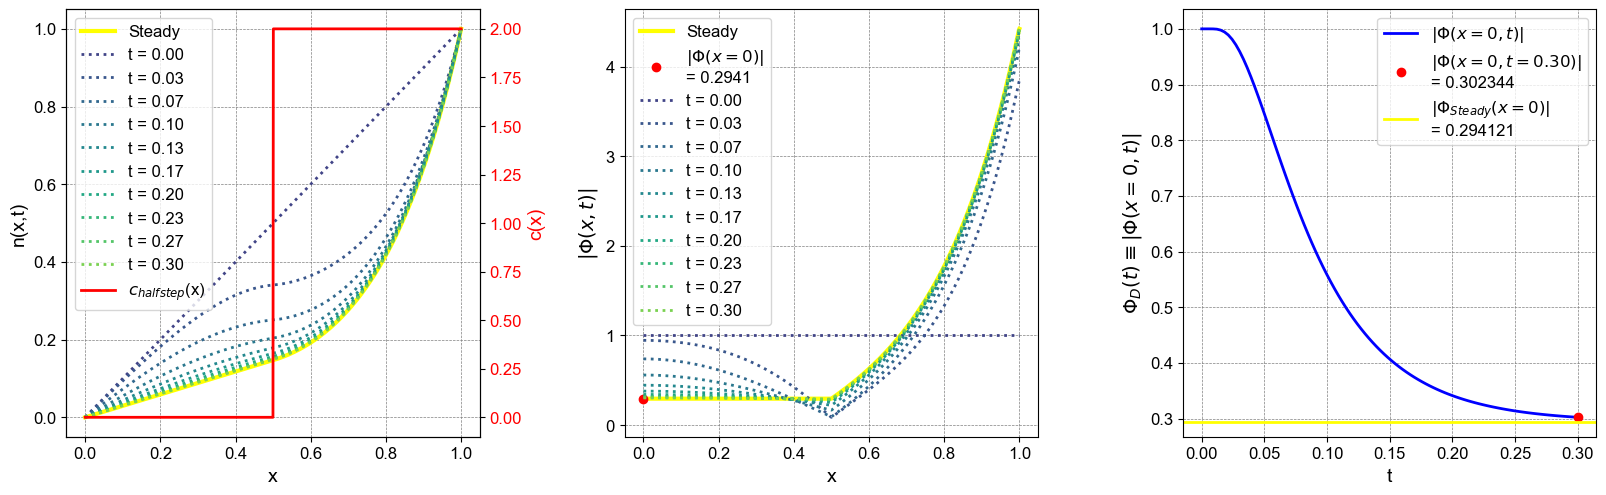

In [10]:
def c_halfstep(x):
    l=L/2
    return np.where(x < l, 0, 1 / (L-l)) # 1/l if x < l, else 0

S1D = Solver1D(syst_params, c_halfstep, n0_linear)
S1D.pde.solve(); S1D.ode.solve()
S1D.plot.triple_plot()

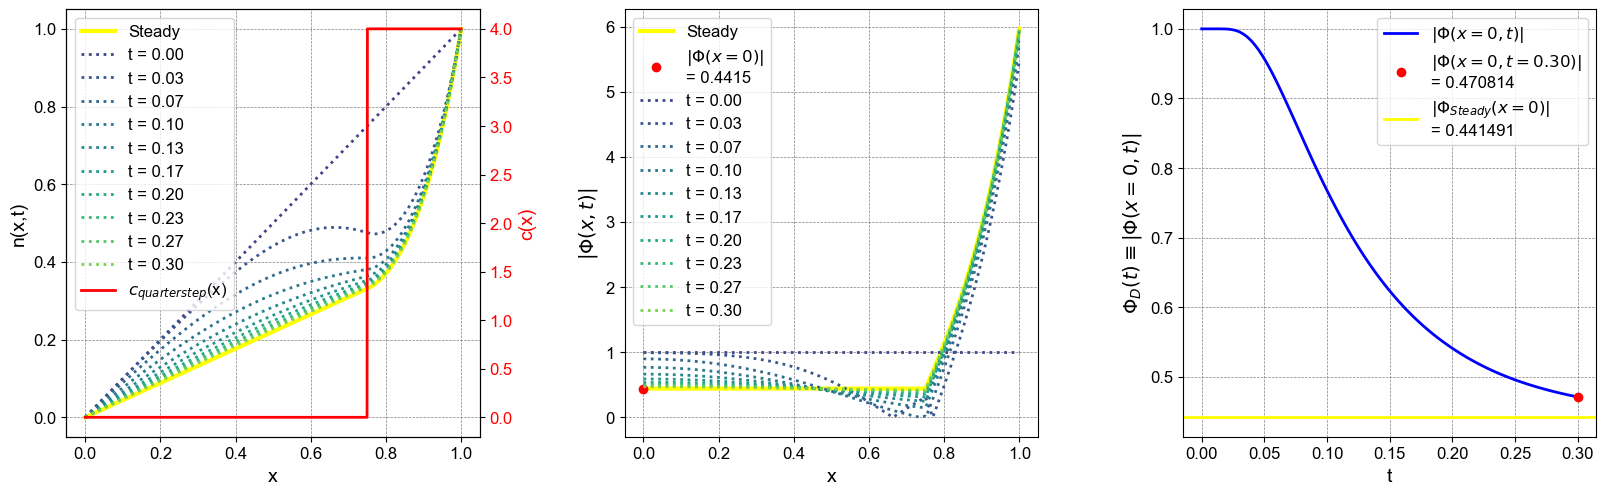

In [11]:
def c_quarterstep(x):
    l=L*3/4
    return np.where(x < l, 0, 1 / (L-l) ) # 0 if x < l, else 1/L-l

S1D = Solver1D(syst_params, c_quarterstep, n0_linear)
S1D.pde.solve(); S1D.ode.solve()
S1D.plot.triple_plot()

#### 3.2. Two Parameters 📄

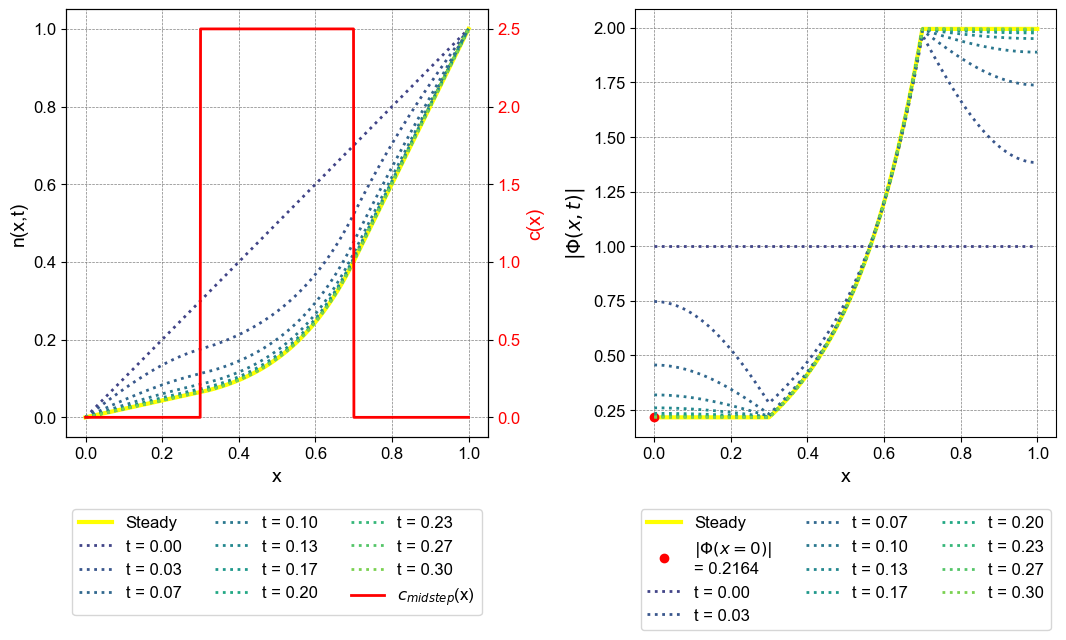

In [12]:
def c_midstep(x):
    x0 = L*3/10     # Starting point of the step
    l  = L*2/5      # Length of the step
    cond = (x >= x0) & (x <= x0 + l)
    return np.where( cond , 1/l , 0)

S1D = Solver1D(syst_params, c_midstep, n0_linear)
S1D.pde.solve(); S1D.ode.solve()
S1D.plot.double_plot(legend_loc='outside')

S1D.plot.save(figures_path, "c_midstep(x)")

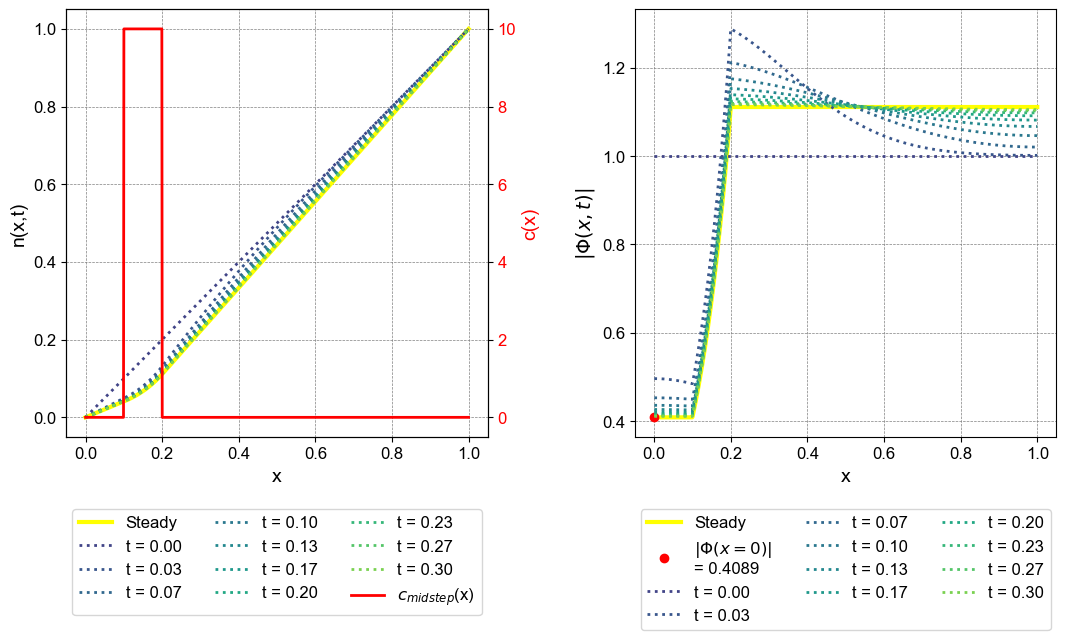

In [13]:
def c_midstep(x):
    x0 = L*0.1 # Starting point of the step
    l  = L*0.1 # Length of the step
    cond = (x >= x0) & (x <= x0 + l)
    return np.where( cond , 1/l , 0)

S1D = Solver1D(syst_params, c_midstep, n0_linear)
S1D.pde.solve(); S1D.ode.solve()
S1D.plot.double_plot(legend_loc='outside')